In [14]:
import numpy as np
import QMC_square as qmc
from matplotlib import pyplot as plt 
from matplotlib import colors as mclr
from matplotlib import cm
import time as time

import importlib

### Plotting settings 
#plt.rc('figure', dpi=100)
#plt.rc('figure',figsize=(4,1.7))
plt.rc('font', family = 'Times New Roman')
plt.rc('font', size = 14)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=18)
plt.rc('lines', linewidth=2.5)

In [50]:
L = 6
M = np.array([8,10,12,14])
dt = 0.05

temperatures = qmc.QMC.calc_temperature(dt,M)
print(temperatures)
Ej = 1.
Ec = 0.2

nburn = int(1e6)
nsample = 30
nstep = int(1e3)


actions = []
OPs = []
vorts = []
angles = []


[2.5        2.         1.66666667 1.42857143]


In [51]:
for i in range(len(temperatures)):
    samples = qmc.QMC(Ej,Ec,temperatures[i],L,M[i])
    samples.local_field_draw = True 
    samples.set_sampling(nburn,nsample,nstep)
    samples.burn()
    samples.sample()

    actions.append(samples.action_samples)
    OPs.append(samples.OP_samples)
    vorts.append(samples.vort_samples)
    angles.append(samples.theta_samples)


    

In [52]:
def OP_statistics(OPs):
    ### First we compute the mean and variance of the order parameter over the sample 

    op = np.mean(np.abs(OPs))
    std = np.std(np.abs(OPs))

    return op,std 

def correlation(thetas):
    ### We compute there correlation function < e^(i theta(r) - itheta(0) ) > averaged over spacetime for different linear separations r 

    rotors = np.exp(1.j*thetas)

    L = thetas.shape[0]

    shifts = np.arange(L)

    output = np.zeros(L,dtype=complex)

    for i in range(L):
        output[i] = np.mean( np.roll(rotors,i,[0] )*np.conjugate(rotors) )

    return output

def vortex_statistics(vorts):
    ### We compute the mean vorticity and the variance 
    mean = np.mean(np.abs(vorts))
    std = np.std( np.abs(vorts))

    return mean, std 

def charge_statistics(angles):
    ### We compute the statistics of the charge fluctuations dtheta/dt 

    ### First we compute the derivative in time
    angles = np.unwrap(angles,axis=2)
    dthetadt = np.gradient(angles,axis=2)/dt

    ### Next we compute the std dev of this 
    std = np.std(dthetadt)

    mean = np.mean(np.abs(dthetadt))
    return mean,std 

    

In [53]:
job_no = len(M)
temps = np.zeros(job_no)
ops = np.zeros(job_no)
stds = np.zeros(job_no)
mean_vorts = np.zeros(job_no)
std_vorts = np.zeros(job_no) 
mean_charge = np.zeros(job_no)
std_charge = np.zeros(job_no)

correlation_function = np.zeros((L,job_no),dtype=complex)

8
2.5


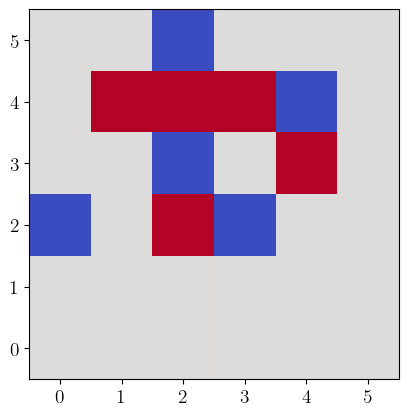

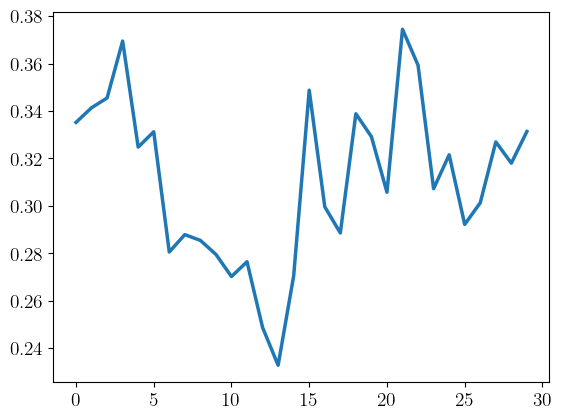

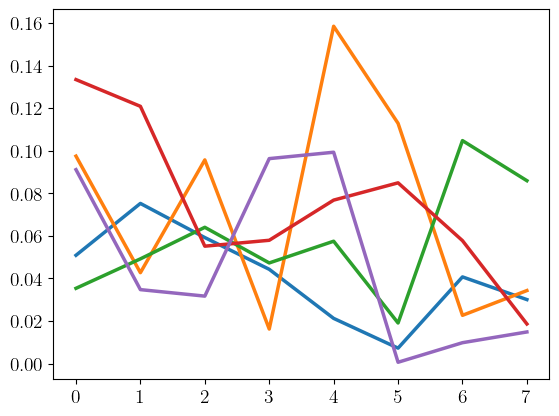

10
2.0


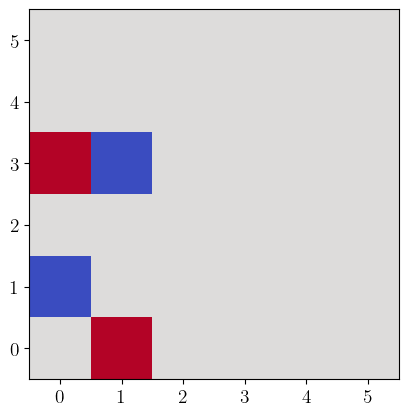

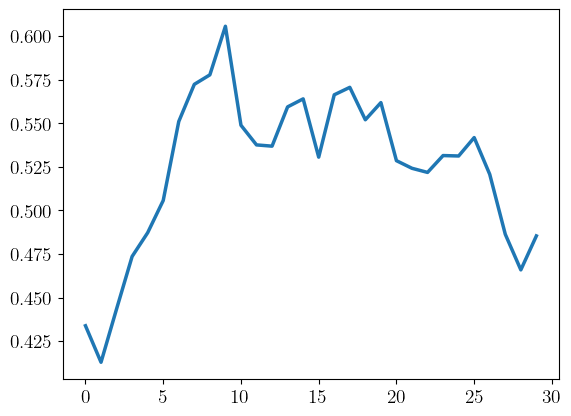

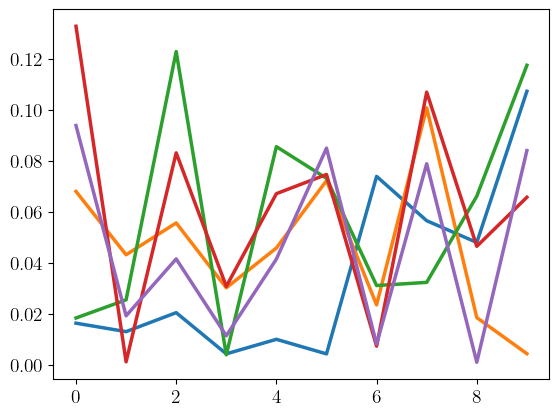

12
1.6666666666666665


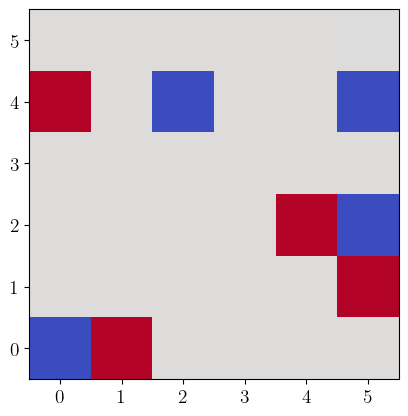

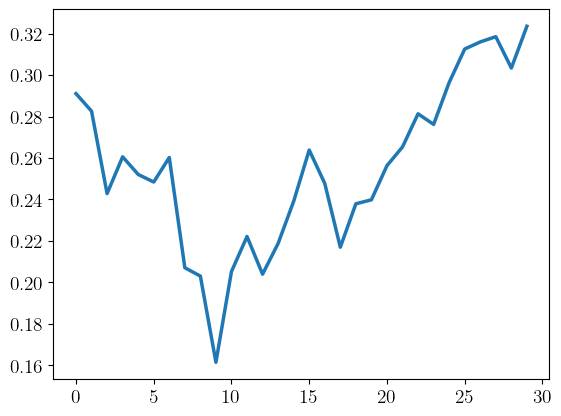

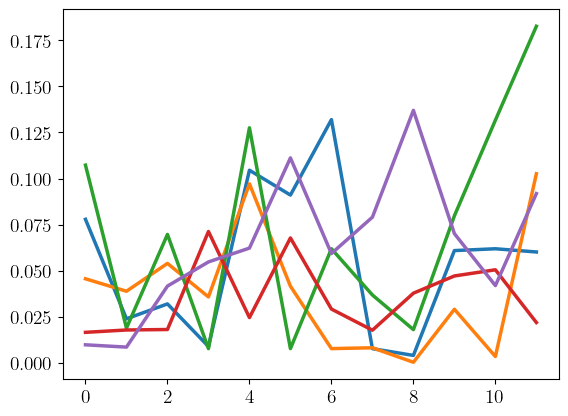

14
1.4285714285714284


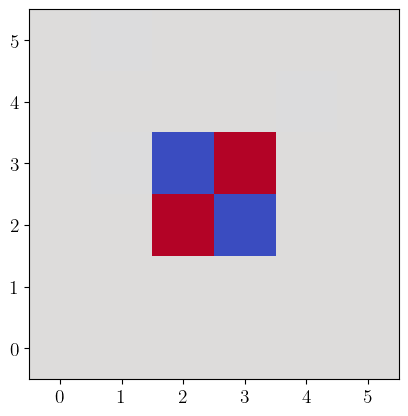

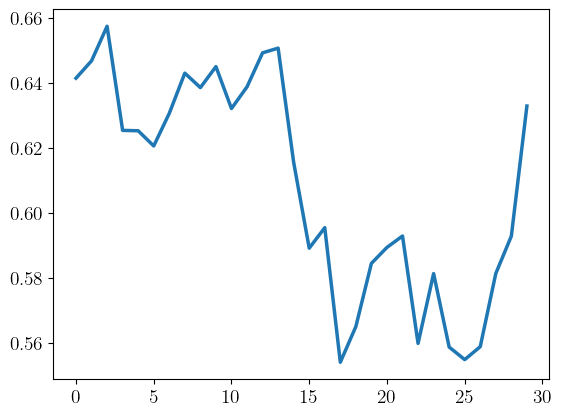

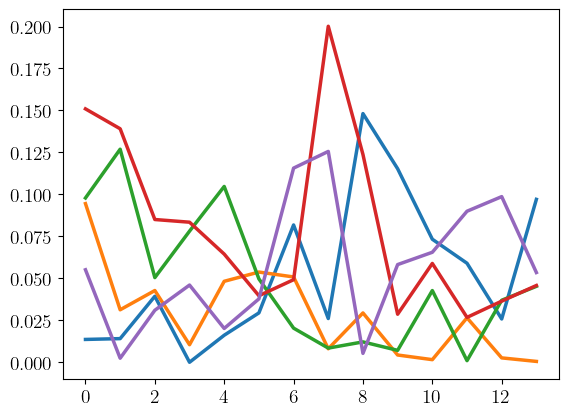

In [54]:
for job in range(len(M)):
    print(M[job])
    print(temperatures[job])
    ops[job],stds[job] = OP_statistics(OPs[job])
    correlation_function[:,job] = correlation(angles[job]) 
    av_vorts,st_vorts = vortex_statistics(vorts[job])
    mean_vorts[job] = av_vorts
    std_vorts[job] = st_vorts
    mean_charge[job], std_charge[job] = charge_statistics(angles[job])


    
    plt.imshow(np.transpose(vorts[job][:,:,0,-1]),origin='lower',cmap='coolwarm',norm=mclr.Normalize(-2.*np.pi,2.*np.pi) )
    plt.show()
    plt.plot(np.abs(OPs[job]))
    plt.show()

    for j in range(0,10,2):
        plt.plot(np.abs(np.gradient(np.unwrap(angles[job],axis=2)[0,0,:,j])))
    plt.show()

In [5]:
import TWA_square as twa

In [6]:
importlib.reload(twa)

<module 'TWA_square' from '/home/jcurtis/Projects/XYML/src/TWA_square.py'>

In [7]:
twa_sim = twa.TWDynamics(samples,tf,ntimes)

In [8]:
twa_sim.run_dynamics()

In [9]:
twa_sim.dof_t.shape

(200, 2, 5, 5, 10)

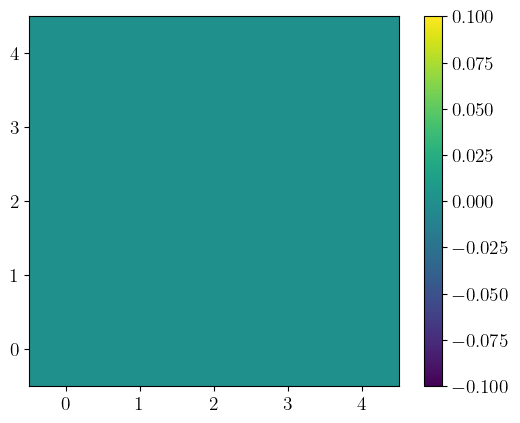

In [10]:
plt.imshow(twa_sim.dof_t[0,1,:,:,0],origin='lower')
plt.colorbar()
plt.show()

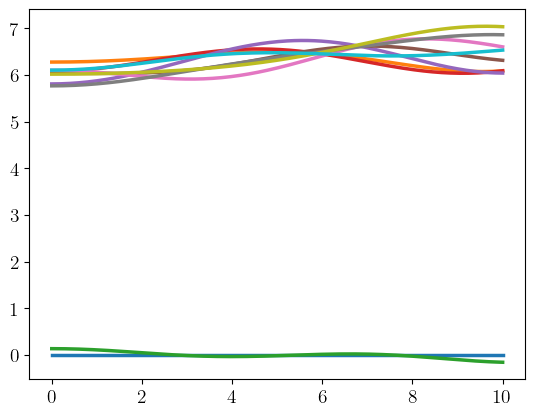

In [11]:
for i in range(nsample):
    plt.plot(twa_sim.times,twa_sim.trajectories[:,0,0,i])
plt.show()

In [12]:
print(twa_sim.times[0])

0.0


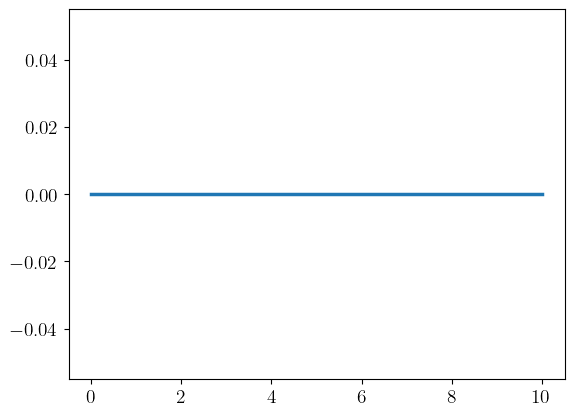

In [13]:
plt.plot(twa_sim.times,twa_sim.trajectories[:,0,0,0])
plt.show()